In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# TASK 1: Read clubs stats and display.

In [3]:
# Read file csv to dataframe
table = pd.read_csv('DATA/TeamStats.csv')
# Delete column 'Next'
table = table.drop(columns="Next")

In [4]:
# print table
table

,Position,Club,Played,Won,Drawn,Lost,GF,GA,GD,Points
0,1,Liverpool,25,24,1,0,60,15,45,73
1,2,Manchester City,25,16,3,6,65,29,36,51
2,3,Leicester City,25,15,4,6,54,26,28,49
3,4,Chelsea,25,12,5,8,43,34,9,41
4,5,Sheffield United,26,10,9,7,28,24,4,39
5,6,Tottenham Hotspur,25,10,7,8,40,32,8,37
6,7,Everton,26,10,6,10,34,38,-4,36
7,8,Manchester United,25,9,8,8,36,29,7,35
8,9,Wolverhampton Wanderers,25,8,11,6,35,32,3,35
9,10,Arsenal,25,6,13,6,32,34,-2,31


# TASK 2: Display goals scored and lost for all clubs.

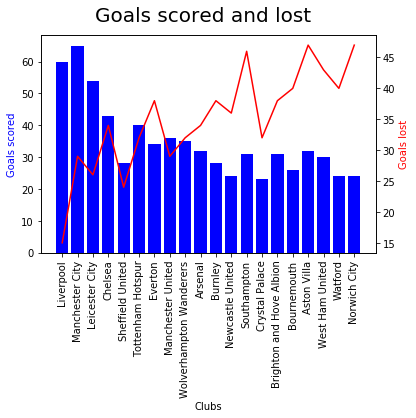

In [5]:
# get club names as list 
clubs = table.Club.tolist()

# add subplots (additional axis)
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()

# draw 
ax1.bar(clubs, table['GF'], color='b')
ax2.plot(clubs, table['GA'], 'r-')

# table title
fig.suptitle('Goals scored and lost', fontsize=20)

ax1.set_xlabel("Clubs")
plt.setp(ax1.xaxis.get_majorticklabels(), rotation=90)

ax1.set_ylabel('Goals scored', color='b')
ax2.set_ylabel('Goals lost', color='r')

plt.show()

# TASK 3: Display won and lost match for clubs. 

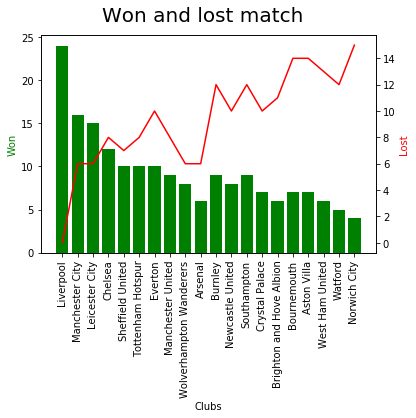

In [6]:
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(clubs, table['Won'], color='g')
ax2.plot(clubs, table['Lost'], 'r-')

# table title
fig.suptitle('Won and lost match', fontsize=20)

ax1.set_xlabel("Clubs")
# set transformation for clubs name
plt.setp(ax1.xaxis.get_majorticklabels(), rotation=90)

ax1.set_ylabel('Won', color='g')
ax2.set_ylabel('Lost', color='r')

plt.show()

# TASK 4: Display ten the most draw clubs.

In [7]:
# sort the table by the 'draw' column in descending order
draw_table = table.sort_values("Drawn", ascending = False)
# reset table indexes
draw_table.reset_index(drop=True, inplace=True)
# print table
draw_table[:10]

,Position,Club,Played,Won,Drawn,Lost,GF,GA,GD,Points
0,10,Arsenal,25,6,13,6,32,34,-2,31
1,9,Wolverhampton Wanderers,25,8,11,6,35,32,3,35
2,19,Watford,26,5,9,12,24,40,-16,24
3,5,Sheffield United,26,10,9,7,28,24,4,39
4,14,Crystal Palace,26,7,9,10,23,32,-9,30
5,15,Brighton and Hove Albion,26,6,9,11,31,38,-7,27
6,8,Manchester United,25,9,8,8,36,29,7,35
7,6,Tottenham Hotspur,25,10,7,8,40,32,8,37
8,12,Newcastle United,25,8,7,10,24,36,-12,31
9,20,Norwich City,25,4,6,15,24,47,-23,18


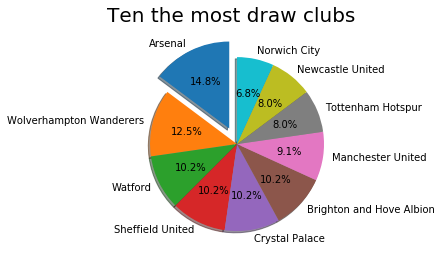

In [8]:
# DRAW PIE 

# labels is the name of ten the most tie clubs
labels = draw_table['Club'][:10]

# Variable sizes are the data that will be displayed on the pie
sizes = draw_table['Drawn'][:10]

# only "explode" the 1nd slice 
explode = (0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)  

fig1, ax1 = plt.subplots()
fig1.suptitle('Ten the most draw clubs', fontsize=20)

# settings of draw
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)

plt.show()

# TASK 5: Get statistics for all clubs and add to one file.

In [9]:
# load all files into one list

import glob

# path to clubs files
path = "/home/lukas/Pulpit/Liga angielska/DATA/clubs"

# get paths to all file in the folder
name_clubs = glob.glob(path + "/*.csv")

clubs = []
for club in name_clubs:
    # add colum 'club'
    club_data = pd.read_csv(club)
    # Variable club is the full path to the file: '/home/lukas/Pulpit/Liga angielska/DANE/kluby/Crystal-Palace.csv'
    # Split the variable with '/', then get the last inxex element and cut the end of txt: '.csv'
    club = club.split('/')[-1][0:-4]
    if '-' in club:
        # replace the sign from 'Manchester-City' with 'Manchester City'
        club = club.replace('-', ' ')
    
    # add column: 'club'
    club_data['club'] = club
    # add value to the list
    clubs.append(club_data)

In [10]:
# combine into one Dataframe 
players = pd.concat(clubs, ignore_index=True)
# replace the nan value to zero
players.fillna(0, inplace=True)
players

,name,position,Saves,Penalties saved,Punches,High Claims,Catches,Sweeper clearances,Throw outs,Goal Kicks,...,Goals with left foot,Hit woodwork,Goals per match,Penalties scored,Freekicks scored,Shots,Shots on target,Shooting accuracy %,Big chances missed,club
0,Rui Patrício,Goalkeeper,67.0,2.0,3.0,9.0,3.0,1.0,88.0,199.0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,Wolverhampton Wanderers
1,John Ruddy,Goalkeeper,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,Wolverhampton Wanderers
2,Andreas Söndergaard,Goalkeeper,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,Wolverhampton Wanderers
3,Matt Doherty,Defender,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,1.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,Wolverhampton Wanderers
4,Willy Boly,Defender,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,Wolverhampton Wanderers
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
702,Giovanni McGregor,Midfielder,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,Crystal Palace
703,Wilfried Zaha,Forward,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.12,0.0,0.0,37.0,10.0,27.0,2.0,Crystal Palace
704,Christian Benteke,Forward,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,3.0,0.06,0.0,0.0,20.0,12.0,60.0,1.0,Crystal Palace
705,Jordan Ayew,Forward,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.24,0.0,0.0,35.0,13.0,37.0,4.0,Crystal Palace


# TASK 6: Who is top scorer? List of the ten best-scoring players.

In [11]:
# get the columns: 'name', 'Goals', 'club' and sort the DataFrame by 'Goals' in descending order.
# Get the top 10 players.
players[['name', 'Goals', 'club' ]].sort_values('Goals',ascending=False).head(10)

,name,Goals,club
290,Jamie Vardy,17,Leicester City
178,Sergio Agüero,16,Manchester City
452,Pierre-Emerick Aubameyang,14,Arsenal
559,Danny Ings,14,Southampton
396,Marcus Rashford,14,Manchester United
499,Mohamed Salah,14,Liverpool
678,Tammy Abraham,13,Chelsea
177,Raheem Sterling,11,Manchester City
27,Raúl Jiménez,11,Wolverhampton Wanderers
498,Sadio Mané,11,Liverpool


# TASK 7: List of ten players who have assist the most.

In [12]:
# get the columns: 'name', 'Assists', 'club' and sort the DataFrame by 'Assists' in descending order.
# Get the top 10 players.
players[['name', 'Assists', 'club' ]].sort_values('Assists',ascending=False).head(10)

,name,Assists,club
168,Kevin De Bruyne,15,Manchester City
471,Trent Alexander-Arnold,10,Liverpool
170,David Silva,7,Manchester City
586,Son Heung-Min,7,Tottenham Hotspur
176,Riyad Mahrez,7,Manchester City
224,Emiliano Buendía,7,Norwich City
497,Roberto Firmino,7,Liverpool
26,Adama Traoré,7,Wolverhampton Wanderers
15,João Moutinho,6,Wolverhampton Wanderers
468,Andrew Robertson,6,Liverpool


# TASK 8: Display a comparision efficient for ten the most scoring players.

In [13]:
# get the columns: 'name', 'Shots', 'club' and sort the DataFrame by 'Shots' in descending order.
# Get the top 10 players.
players[['name', 'Shots', 'Goals', 'club' ]].sort_values('Goals',ascending=False).head(10)

,name,Shots,Goals,club
290,Jamie Vardy,53.0,17,Leicester City
178,Sergio Agüero,64.0,16,Manchester City
452,Pierre-Emerick Aubameyang,58.0,14,Arsenal
559,Danny Ings,62.0,14,Southampton
396,Marcus Rashford,74.0,14,Manchester United
499,Mohamed Salah,85.0,14,Liverpool
678,Tammy Abraham,72.0,13,Chelsea
177,Raheem Sterling,68.0,11,Manchester City
27,Raúl Jiménez,81.0,11,Wolverhampton Wanderers
498,Sadio Mané,53.0,11,Liverpool


In [14]:
# get a list of the top ten players scoring
shooter = players.sort_values('Goals', ascending=False).head(10)

In [15]:
# Players effectiveness is measured by dividing the number of goals by the number of shots.
shooter['Efficient [%]'] = shooter['Goals'] / shooter['Shots'] * 100
# Round to two decimal places.
shooter['Efficient [%]'] = shooter['Efficient [%]'].round(2)

In [16]:
# Get the columns
shooter_goals = shooter[['name', 'Goals','Shots', 'Efficient [%]','club' ]]
shooter_goals

,name,Goals,Shots,Efficient [%],club
290,Jamie Vardy,17,53.0,32.08,Leicester City
178,Sergio Agüero,16,64.0,25.00,Manchester City
452,Pierre-Emerick Aubameyang,14,58.0,24.14,Arsenal
559,Danny Ings,14,62.0,22.58,Southampton
396,Marcus Rashford,14,74.0,18.92,Manchester United
499,Mohamed Salah,14,85.0,16.47,Liverpool
678,Tammy Abraham,13,72.0,18.06,Chelsea
177,Raheem Sterling,11,68.0,16.18,Manchester City
27,Raúl Jiménez,11,81.0,13.58,Wolverhampton Wanderers
498,Sadio Mané,11,53.0,20.75,Liverpool


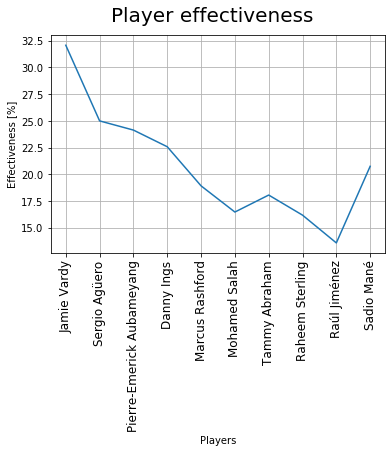

In [17]:
# Draw a plot
result = shooter_goals['Efficient [%]']
name_palyers = shooter_goals['name'].tolist()

plt.grid()
plt.plot(name_palyers, result)
plt.xticks(name_palyers, rotation='vertical', size=12)
plt.ylabel("Effectiveness [%]")
plt.xlabel("Players")

plt.suptitle('Player effectiveness', fontsize=20)

plt.show()

# TASK 9: Display the number of goals and shots.

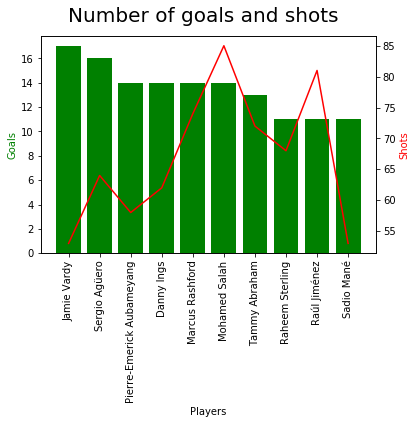

In [18]:
# Draw a plot with two axis
fig, ax1 = plt.subplots()

fig.suptitle('Number of goals and shots', fontsize=20)

ax2 = ax1.twinx()

ax1.bar(name_palyers, shooter_goals['Goals'], color='g')
ax2.plot(name_palyers, shooter_goals['Shots'], color='r')

ax1.set_xlabel("Players")
plt.setp(ax1.xaxis.get_majorticklabels(), rotation=90)

ax1.set_ylabel('Goals', color='g')
ax2.set_ylabel('Shots', color='r')

plt.show()

# TASK 10: Get players who have a yellow card and a red card [Show number of appearances] 

In [19]:
players[(players['Yellow cards'] > 0) & (players['Red cards'] > 0)][['name', 'Yellow cards', 'Red cards','Appearances']]

,name,Yellow cards,Red cards,Appearances
14,Romain Saïss,7,1,21
34,Adrian Mariappa,2,1,15
39,Christian Kabasele,1,2,16
71,Simon Francis,2,1,14
72,Steve Cook,3,1,19
85,Jefferson Lerma,9,1,22
123,Billy Sharp,1,1,16
135,Christopher Schindler,4,1,26
140,Jonathan Hogg,4,1,19
155,Ederson,3,1,22


# TASK 11: How many players does each club have?

In [20]:
players.groupby('club').count()['name']

club
Arsenal                     31
Aston Villa                 29
Bournemouth                 34
Brighton and Hove Albion    40
Burnley                     29
Cardiff City                30
Chelsea                     28
Crystal Palace              27
Everton                     26
Fulham                      30
Huddersfield Town           25
Leicester City              25
Liverpool                   48
Manchester City             27
Manchester United           40
Newcastle United            32
Norwich City                27
Sheffield United            28
Southampton                 25
Tottenham Hotspur           29
Watford                     37
West Ham United             30
Wolverhampton Wanderers     30
Name: name, dtype: int64

# TASK 12: The number of goals of each club. 

In [21]:
players.groupby('club').sum().sort_values('Goals', ascending=False)['Goals']

club
Manchester City             65
Liverpool                   58
Leicester City              52
Chelsea                     43
Tottenham Hotspur           37
Manchester United           35
Aston Villa                 32
Arsenal                     32
Everton                     31
Southampton                 31
Wolverhampton Wanderers     31
West Ham United             29
Burnley                     27
Brighton and Hove Albion    26
Bournemouth                 25
Cardiff City                24
Newcastle United            24
Sheffield United            24
Watford                     24
Norwich City                22
Fulham                      21
Crystal Palace              21
Huddersfield Town           12
Name: Goals, dtype: int64